Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
pwd

'c:\\ZOMATO TIME PREDICTION\\notebooks'

In [4]:
df = pd.read_csv("data/finalTrain.csv")

In [5]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [6]:

df.shape

(45584, 20)

In [7]:
## We can drop IDs related column as they do not provide any detail for training our model:

df = df.drop(labels = ['ID','Delivery_person_ID'],axis = 1)
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [8]:

df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [9]:
df.isnull().mean()*100

Delivery_person_Age            4.067217
Delivery_person_Ratings        4.185679
Restaurant_latitude            0.000000
Restaurant_longitude           0.000000
Delivery_location_latitude     0.000000
Delivery_location_longitude    0.000000
Order_Date                     0.000000
Time_Orderd                    3.797385
Time_Order_picked              0.000000
Weather_conditions             1.351351
Road_traffic_density           1.318445
Vehicle_condition              0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
multiple_deliveries            2.178396
Festival                       0.500176
City                           2.632503
Time_taken (min)               0.000000
dtype: float64

We will drop the rows which has less than 1.5% of missing NA values

In [10]:
## Columns which has these NA values less than 1.5%

cols = [var for var in df.columns if df[var].isnull().mean() < 0.015 and df[var].isnull().mean() > 0]
cols

['Weather_conditions', 'Road_traffic_density', 'Festival']

Impact on the dataset after removing these null rows from cols

In [11]:

len(df[cols].dropna()) / len(df)

0.9815505440505441

So overall impact on the dataset will be less than 2%.

Now we will check if the values which needs to be removed, will be removed randomly or not:

In [12]:
df[cols].head()

,Weather_conditions,Road_traffic_density,Festival
0,Fog,Jam,No
1,Stormy,High,No
2,Sandstorms,Medium,No
3,Sandstorms,Low,No
4,Fog,Jam,No


In [13]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((45584, 18), (44743, 3))

In [14]:

new_df.head()

,Weather_conditions,Road_traffic_density,Festival
0,Fog,Jam,No
1,Stormy,High,No
2,Sandstorms,Medium,No
3,Sandstorms,Low,No
4,Fog,Jam,No


In [15]:
new_df['Weather_conditions'].value_counts()

Weather_conditions
Fog           7642
Stormy        7541
Cloudy        7515
Sandstorms    7463
Windy         7380
Sunny         7202
Name: count, dtype: int64

In [16]:
## Now we will check if the removed values are removed randomly or not:

temp = pd.concat([
            # percentage of observations per category, original data
            df['Weather_conditions'].value_counts()*100 / len(df),

            # percentage of observations per category, cca data
            new_df['Weather_conditions'].value_counts() *100/ len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Weather_conditions,,
Fog,16.788786,17.079767
Stormy,16.637417,16.854033
Cloudy,16.525535,16.795923
Sandstorms,16.439979,16.679704
Windy,16.282029,16.494200
Sunny,15.974903,16.096373


In [17]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['Road_traffic_density'].value_counts()*100 / len(df),

            # percentage of observations per category, cca data
            new_df['Road_traffic_density'].value_counts() *100/ len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Road_traffic_density,,
Low,33.950509,34.284693
Jam,31.017462,31.504369
Medium,24.010618,24.368058
High,9.702966,9.842880


In [18]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['Festival'].value_counts()*100 / len(df),

            # percentage of observations per category, cca data
            new_df['Festival'].value_counts() *100/ len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Festival,,
No,97.534223,98.037682
Yes,1.965602,1.962318


Hence we can drop the NA values from those columns as it doesnot affect the distribution

In [19]:
df = df.dropna(subset=cols)

In [20]:
df.shape

(44743, 18)

We can export this dataset and use it as raw data

In [21]:
file_path = "data/converted.csv"

In [22]:
df.to_csv(file_path,index=False)

PermissionError: [Errno 13] Permission denied: 'data/converted.csv'

In [23]:
df["Delivery_person_Ratings"].unique()

array([4.2, 4.7, 4.3, 4.5, 4. , 4.9, 4.1, 5. , 4.8, 3.5, 4.6, nan, 4.4,
       3.8, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 3.2, 3.3, 3.4, 2.8, 2.9,
       3. ])

In [24]:
df.isnull().sum()

Delivery_person_Age            1322
Delivery_person_Ratings        1375
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1109
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             969
Festival                          0
City                           1160
Time_taken (min)                  0
dtype: int64

we would also like to drop all the rows which has NaN values as they donot provide any information:

In [26]:

df.dropna(how = 'all').shape

(44743, 18)

In [32]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43421.000000,43368.000000,44743.000000,44743.000000,44743.000000,44743.000000,44743.000000,43774.000000,44743.000000
mean,29.576196,4.634678,17.140683,70.601956,17.469516,70.829817,0.999262,0.746630,26.366515
std,5.761571,0.314340,7.938875,21.680522,7.340693,21.138683,0.816893,0.571901,9.344705
min,20.000000,2.500000,-30.905562,-88.352885,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.988453,73.279083,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.898497,18.634382,76.002471,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785207,78.105733,2.000000,1.000000,32.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,2.000000,3.000000,54.000000


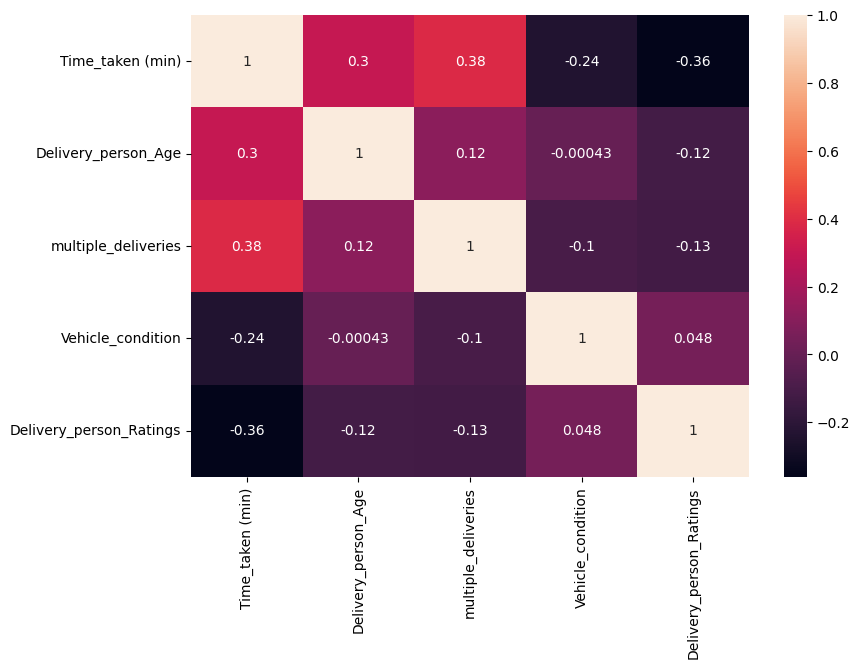

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
sns.heatmap(df[["Time_taken (min)","Delivery_person_Age","multiple_deliveries","Vehicle_condition","Delivery_person_Ratings"]].corr(),annot = True)
plt.show()

In [35]:
from sklearn.impute import SimpleImputer #handling missing values
from sklearn.preprocessing import StandardScaler #Handling feaetrure scaling
from sklearn.preprocessing import OrdinalEncoder #Ordinal Encoding
##Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [38]:
rating_imputer = SimpleImputer(strategy='most_frequent')

In [39]:
df['multiple_deliveries'] = rating_imputer.fit_transform(df[['multiple_deliveries']])

C:\Users\deepa\AppData\Local\Temp\ipykernel_26896\3836963406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['multiple_deliveries'] = rating_imputer.fit_transform(df[['multiple_deliveries']])


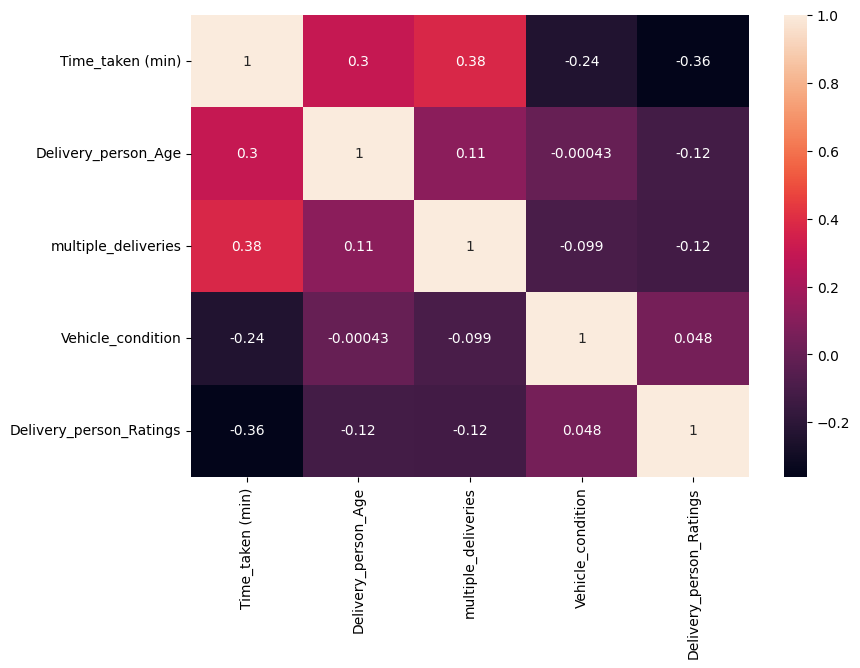

In [40]:
plt.figure(figsize=(9,6))
sns.heatmap(df[["Time_taken (min)","Delivery_person_Age","multiple_deliveries","Vehicle_condition","Delivery_person_Ratings"]].corr(),annot = True)
plt.show()

In [42]:
df["multiple_deliveries"].isnull().sum()

0